Before analyzing any dataset we have to import our libraries into Python. Continue from here tomorrow. 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df_airline = pd.read_csv("Downloads/airline_analysis_flight.csv")

In [10]:
df_airline.head(10)

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2
5,2076,196,0,Yes,Yes,Yes,Friday,No,Yes,435.670,1623.74,4
6,1100,214,0,No,Yes,Yes,Wednesday,No,No,270.080,1279.40,2
7,2012,200,0,Yes,Yes,Yes,Friday,No,Yes,467.290,1687.73,4
8,1055,203,0,No,Yes,Yes,Sunday,No,Yes,407.955,1468.41,2
9,1123,204,0,No,No,Yes,Saturday,No,Yes,349.315,1475.21,2


                                                        (1) Question

1. What do coach ticket prices look like?
2. What are the high and low values?
3. What would be considered average?
4. Does $500 seem like a good price for a coach ticket?

In [12]:
df_airline.coach_price.describe()

count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64

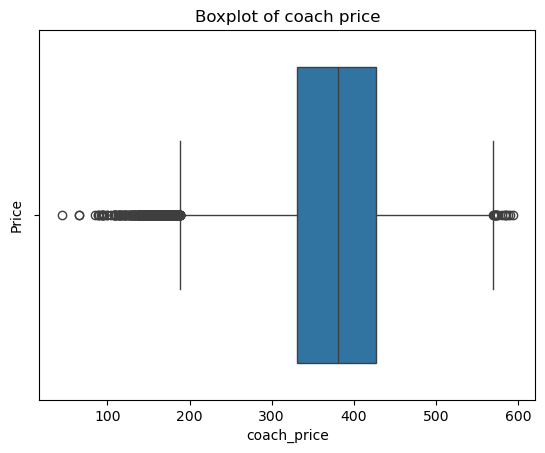

In [13]:
import seaborn as sns
sns.boxplot(x=df_airline['coach_price'])
plt.title("Boxplot of coach price")
plt.ylabel("Price")
plt.show()

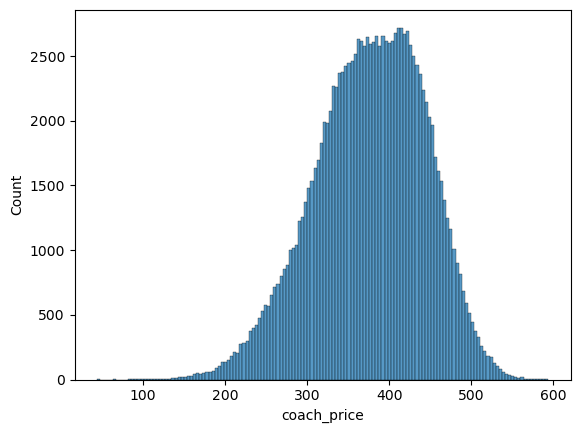

In [14]:
sns.histplot(data = df_airline, x ='coach_price')
plt.show()

                                                             (1) ANSWER
                                                             
Here how the coach price ticket distribution look like :
- Average : 377
- Highest -593
- lowest - 44

  In this visualization we see that the histogram for instance look like a normal distribution. The histogram is fairly symmetric and slightly skewed to the right. The 500 goes the the category of an expensive price since it is close to the tail of the histogram. 
 

                                                    (2)QUESTION

Now visualize the coach ticket prices for flights that are 8 hours long.

1. What are the high, low, and average prices for 8-hour-long flights? 
2. Does a 500$ ticket seem more reasonable than before?

                                                    (2) ANSWER:

- High - 593
- Average- 431
- Low - 431

Yes that seems a bit ok since the average is 431 . So the answer is YES.

It is closer to the center of the plot now than it was before, but still it is not an average price. 

Yes it is now close to the summary stats that it was before.



  1. Yes. It is a bit closer, since the average price for coach ticket that is 8hours cost 431  which makes it closer to 500 $
  2. Yes. In compare to the precious one , it is closer to the summary stats.  


In [17]:
df_airline_long_flights = df_airline[df_airline["hours"]==8] 

In [18]:
df_airline_long_flights.head(2)

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
75,4182,209,0,Yes,Yes,Yes,Wednesday,No,No,416.32,1441.36,8
81,4158,213,0,No,Yes,Yes,Saturday,No,Yes,474.35,1712.92,8


In [19]:
df_airline_long_flights.coach_price.describe()

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64

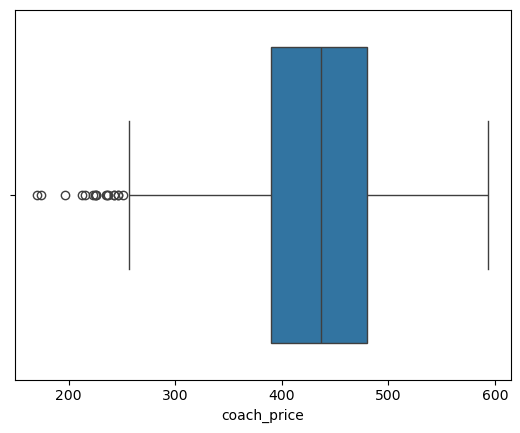

In [20]:
sns.boxplot(x=df_airline_long_flights.coach_price)
plt.show()

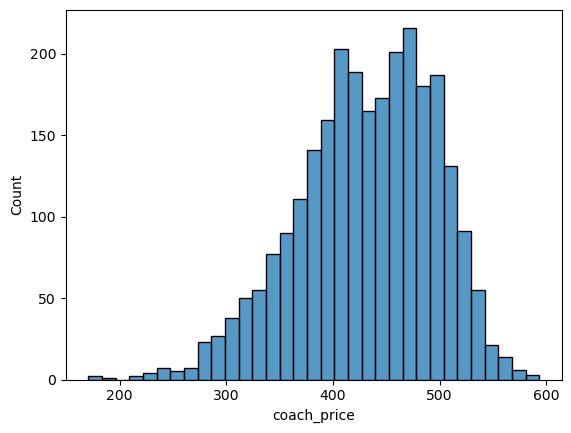

In [21]:
sns.histplot(data = df_airline_long_flights, x= "coach_price")
plt.show()

                                            (2)
                                            
                                HISTOGRAM WITH LONG HOUR LONG FLIGHTS

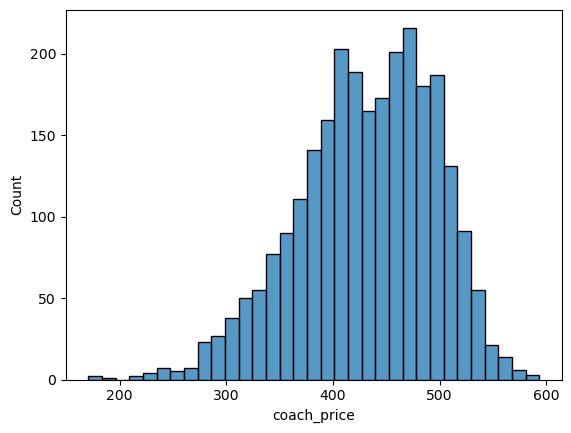

<Figure size 640x480 with 0 Axes>

In [23]:
sns.histplot(df_airline.coach_price[df_airline.hours ==8])
plt.show()
plt.clf()

                                                        Question 3 : 
How are flight delay times distributed? 

Let’s say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. 

What kinds of delays are typical?

To find out what kinds of delays are typical, we need to fist understand our data in general and also with specifically with the delay column by the following command : 
1.  head(),
2.  info()
3. describe()

In [26]:
df_airline.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


We have got:

1. 129780 entries in the delay column
2. without null values

In [28]:
df_airline.delay.info()

<class 'pandas.core.series.Series'>
RangeIndex: 129780 entries, 0 to 129779
Series name: delay
Non-Null Count   Dtype
--------------   -----
129780 non-null  int64
dtypes: int64(1)
memory usage: 1014.0 KB


## With the describe we give the summary stats of the column. 
We are getting the folllowing insights: 

- total entries : 129780
- average delay : 13.16
- min : 0
- max delay : 1560m meaning 26hours .
- std is :41.9
- 25% : 9m
- 50: 10m
- 75: 13m

Mian insight from this data:  
- We have extreme value of outlier which distort the analysis and pulls up the mean to 13minutes , with the median whihc is 50% we can see that the average delay is 10minutes

In [31]:
df_airline.delay.describe()

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64

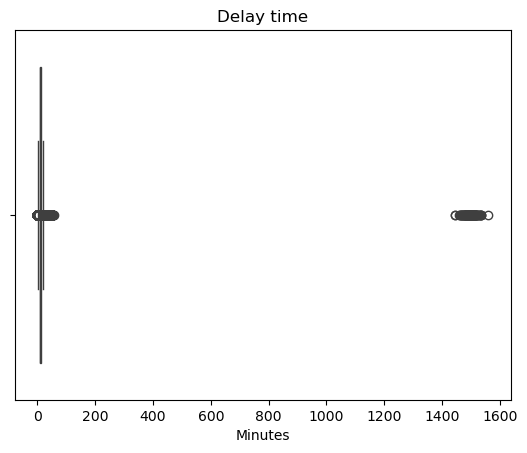

In [32]:
#with seaborn lybrary we illustrate the outlier 
sns.boxplot(x=df_airline['delay'])

#we adding labels for clarity
plt.title("Delay time")
plt.xlabel("Minutes")

#show the plot
plt.show()

## How to choose a threshold wisely?

we use the quantile to see whare the 99% of the data lies 

- we identify here the threshhold to remove the outliers
- understand the distribution shape and tale behaviour
- make a better choice about what range of data to include.

In [34]:
#we use quantile to see at what range 99% of our delays are

df_airline['delay'].quantile(0.99)

38.0

In this part of the code we are trying to remove the outlier in our data  by creating a new data frame. Generally we keep that specific outlier in the original dataframe but for us to better understand the trends and patterns in delats we remove the outlier. 

How it it is done?

create a new df which is "flight_no_outliers", and from out original DF : 

df_airline[df_airline["delay"] <=60]   : this syntax is called boolian indexing 

filtering to give us equal to 60 minutes or less which is much more reasonable. 

In [36]:
#we are subset our data into specific ranges.

flight_no_outliers = df_airline[df_airline['delay'] <=60]

Now with describe () function in pandas we are the summary stats:

We see that we have different sum stats:

- average delay is 12min
- min is 0
- max is 58
- std is 7.7

In [38]:
flight_no_outliers.delay.describe()

count    129680.000000
mean         12.018530
std           7.793645
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max          58.000000
Name: delay, dtype: float64

So this boxplot shows that the typical flight delay time is 10minutes

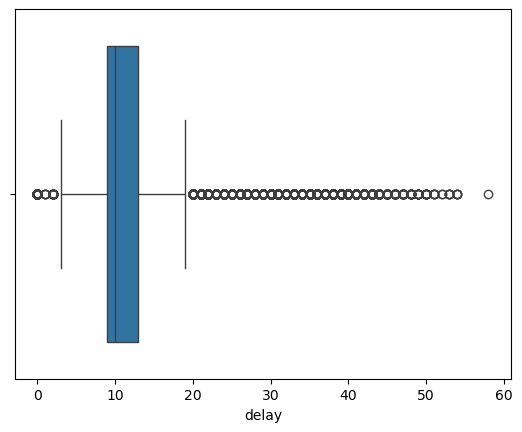

In [40]:
#with seaborn lybrary we illustrate the outlier 

sns.boxplot(x=flight_no_outliers['delay'])


#show the plot
plt.show()

## Bivariate Analysis


What is bivariate analysis ?

BA - is a statistical method used to explore the relationship between two variables. The goal is to determine whether there is an association, correlation, or cause-and-effect relationship between them.

It can involve:

	•	Two numerical variables (e.g., height vs. weight)
	•	One numerical and one categorical variable (e.g., income vs. gender)
	•	Two categorical variables (e.g., education level vs. employment status)

                                                        ## Question 4
Create a visualization that shows the relationship between **coach** and **first-class** prices.

- What is the relationship between these two prices? 
- Do flights with higher coach prices always have higher first-class prices as well?

In [43]:
df_airline.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


In our case we are doing a bivariate analysis with two numerical variables such as coach_price and firstclass_price.


So the best best vusualizatio technique for doing bevariate analysis is a **SCATTERPLOT**

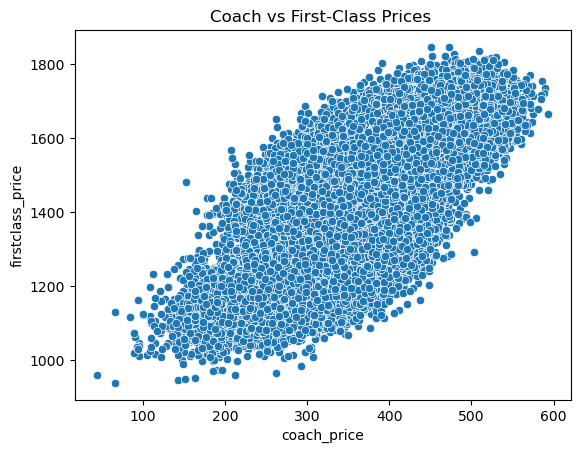

In [45]:
sns.scatterplot(
    data=df_airline,
    x='coach_price',
    y='firstclass_price'
)
plt.title('Coach vs First-Class Prices ')
plt.show()

    This  simple scatterplot between coach prices and first-class prices, you will see that there are too many data points which makes it difficult to see the nuanced relationship between these two features. 

In [47]:
df_airline.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


You might try **changing the opacity** on the points to see if the mass of data points is extra packed in a certain area. 

You could also try **taking a random sample** from the data set to see what a **less busy version** of this plot may look like.

But what might be the most helpful could be adding a LOWESS smoother through the plot.

This can be done using the following code:

sns.lmplot(x = x_var, y = y_var, data = flight, line_kws={'color': 'black'}, lowess=True)


continue from here ......................

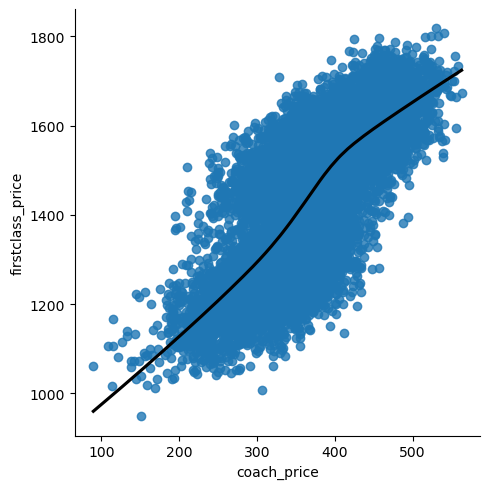

<Figure size 640x480 with 0 Axes>

In [50]:
perc = 0.1
df_airline_sub = df_airline.sample(n = int(df_airline.shape[0]*perc))

sns.lmplot(x = "coach_price", 
           y = "firstclass_price", 
           data = df_airline_sub, 
           line_kws={'color': 'black'}, 
           lowess=True)
plt.show()
plt.clf()

5.
What is the relationship between

coach prices and inflight features:
  
  1. inflight meal,
  2. inflight entertainment, and
  3. inflight WiFi?
 
     Which features are associated with the highest increase in price?

Generally the inflight entertainment and WiFi make a bit the coach price higher, which is almost 400$. 
We came make a conclusion that the average the coach price gets 400 with the inflight features. 

In [52]:
df_airline.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


Boxplot to understanding the correlation between the variables

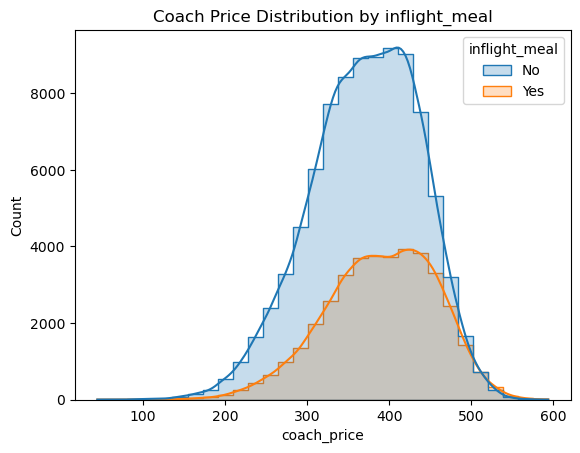

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Coach_Price colored by Is_Promotional
sns.histplot(
    data=df_airline, 
    x='coach_price', 
    hue='inflight_meal', 
    bins=30, 
    kde=True, 
    element='step')
plt.title('Coach Price Distribution by inflight_meal')
plt.show()

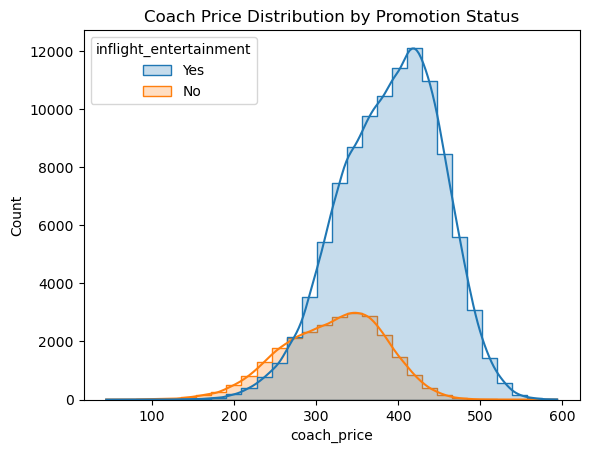

In [55]:

# Histogram of Coach_Price colored by Is_Promotional
sns.histplot(
    data=df_airline, 
    x='coach_price', 
    hue='inflight_entertainment', 
    bins=30, 
    kde=True, 
    element='step')
plt.title('Coach Price Distribution by Promotion Status')
plt.show()

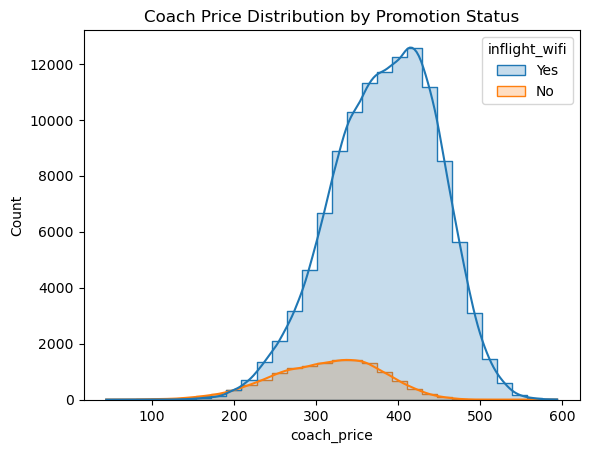

In [56]:

# Histogram of Coach_Price colored by Is_Promotional
sns.histplot(
    data=df_airline, 
    x='coach_price', 
    hue='inflight_wifi', 
    bins=30, 
    kde=True, 
    element='step')
plt.title('Coach Price Distribution by Promotion Status')
plt.show()

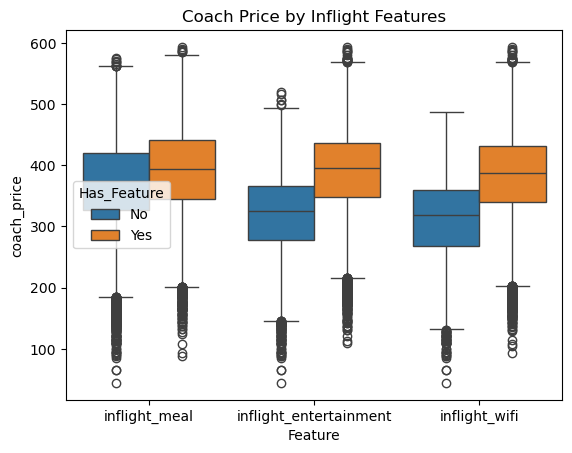

In [57]:
# Example: melt the inflight features columns
inflight_cols = ['inflight_meal', 'inflight_entertainment', 'inflight_wifi']

df_melted = df_airline.melt(id_vars='coach_price', value_vars=inflight_cols,
                    var_name='Feature', value_name='Has_Feature')

sns.boxplot(x='Feature', y='coach_price', hue='Has_Feature', data=df_melted)
plt.title('Coach Price by Inflight Features')
plt.show()

In [58]:
df_airline.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


How does the number of passengers change in relation to the length of flights?

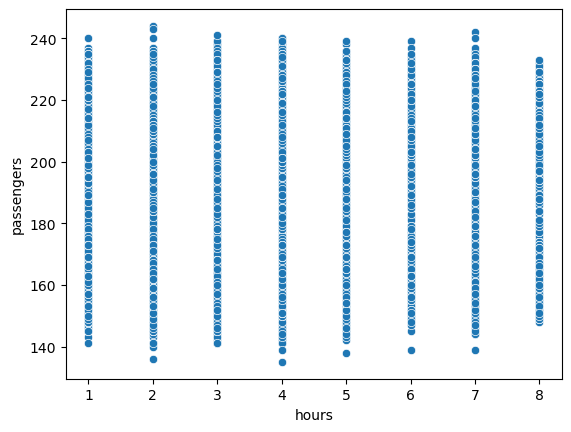

In [60]:
sns.scatterplot(
    data=df_airline,
    x='hours',
    y='passengers'
)
plt.show()

In [61]:
df_airline.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


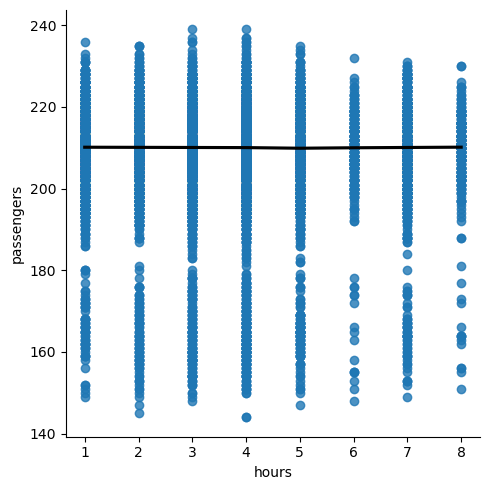

<Figure size 640x480 with 0 Axes>

In [62]:
perc = 0.1
df_airline_sub = df_airline.sample(n = int(df_airline.shape[0]*perc))

sns.lmplot(x = "hours", 
           y = "passengers", 
           data = df_airline_sub,
           line_kws={'color': 'black'}, 
           lowess=True)
plt.show()
plt.clf()

- MULTIVARIATE ANALYSIS

Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

In [65]:
df_airline.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


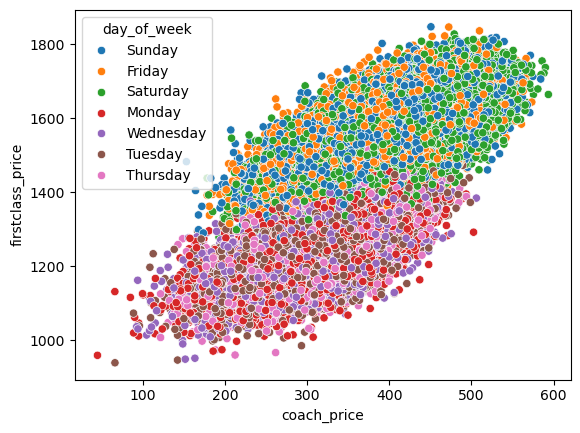

In [66]:
sns.scatterplot(
    data= df_airline,
    x='coach_price',
    y='firstclass_price',
    hue='day_of_week',
    
)
plt.show()

As noted before, this is a really dense scatterplot, so you might consider using a subset of data to make it easier to see relationships in the data.

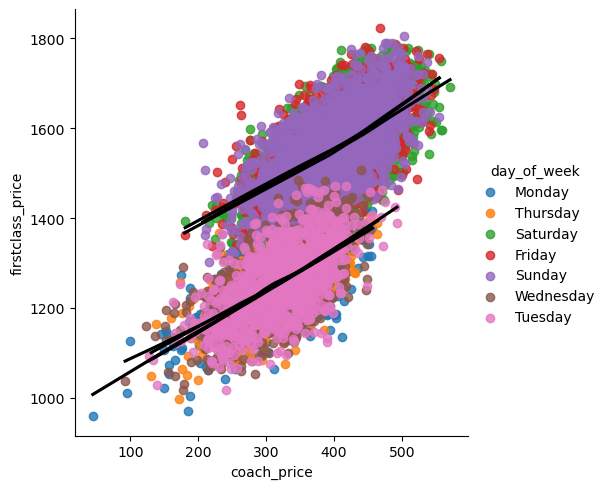

<Figure size 640x480 with 0 Axes>

In [68]:
perc = 0.1
df_airline_sub = df_airline.sample(n = int(df_airline.shape[0]*perc))

sns.lmplot(x = "coach_price", 
           y = "firstclass_price",
           hue = "day_of_week",
           data = df_airline_sub,
           line_kws={'color': 'black'}, 
           lowess=True)
plt.show()
plt.clf()

The scatterplot showing the relationship between coach and first-class prices doesn’t show the difference between weekend flights and weekday flights. Changing the color of points by weekend status using hue will help visualize this relationship.

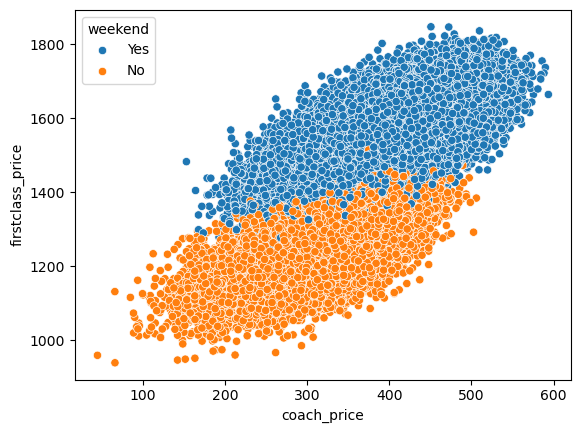

In [70]:
sns.scatterplot(
    data= df_airline,
    x='coach_price',
    y='firstclass_price',
    hue='weekend',
    
)
plt.show()

As noted before, this is a really dense scatterplot, so you might consider using a subset of data to make it easier to see relationships in the data.


- We can see that on average, weekend tickets are more expensive than weekday tickets.


- it’s easier to get a good deal on a first-class ticket on a weekday than on a weekend: the price difference between first-class and coach level tickets is larger on the weekend than on a weekday.

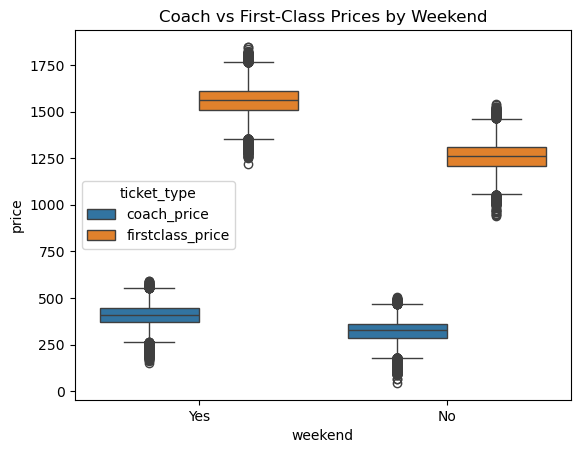

<Figure size 640x480 with 0 Axes>

In [113]:
import matplotlib.pyplot as plt

# Melt the DataFrame to long format for easier plotting
df_melted = pd.melt(
    df_airline,
    id_vars=['weekend'],
    value_vars=['coach_price', 'firstclass_price'],
    var_name='ticket_type',
    value_name='price'
)

# Plot boxplot
sns.boxplot(x='weekend', y='price', hue='ticket_type', data=df_melted)
plt.title('Coach vs First-Class Prices by Weekend')
plt.show()
plt.clf()


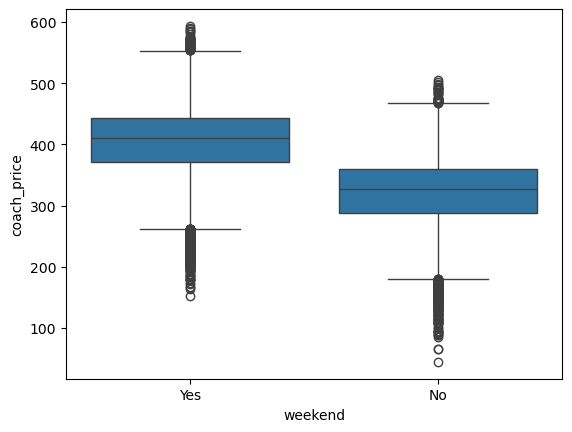

In [123]:
sns.boxplot(x = "weekend", y = "coach_price", data = df_airline)
plt.show()

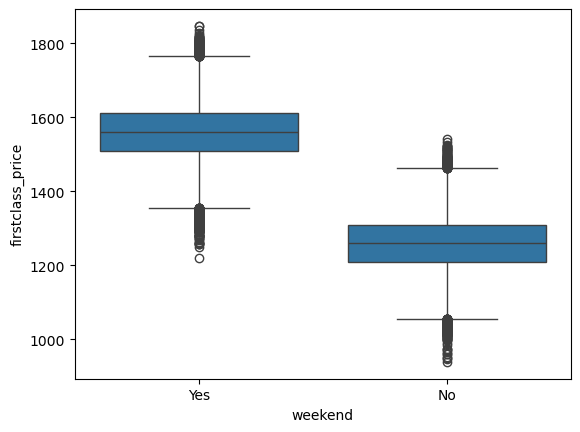

In [127]:
sns.boxplot(x = "weekend", y = "firstclass_price", data = df_airline)
plt.show()

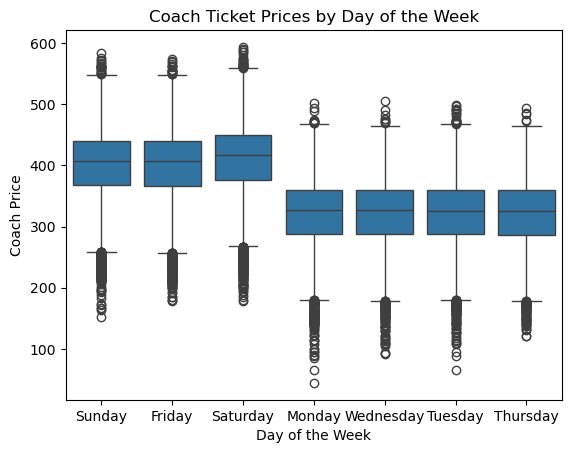

<Figure size 640x480 with 0 Axes>

In [129]:
sns.boxplot(x='day_of_week', y='coach_price', data=df_airline)
plt.title('Coach Ticket Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Coach Price')
plt.show()
plt.clf()

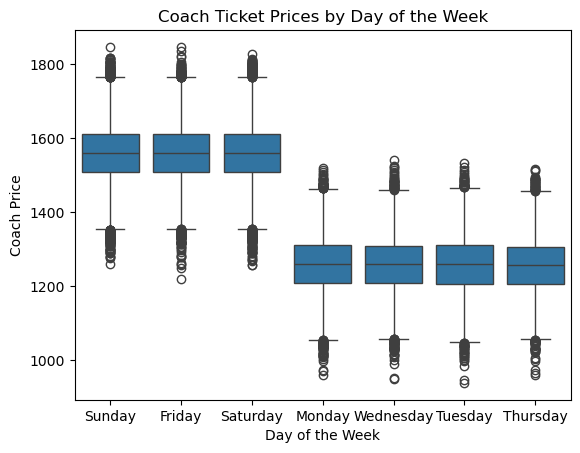

<Figure size 640x480 with 0 Axes>

In [131]:
sns.boxplot(x='day_of_week', y='firstclass_price', data=df_airline)
plt.title('Coach Ticket Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Coach Price')
plt.show()
plt.clf()